# WeatherPy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [4]:
#Create empty lists to store data
cities_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

#Set Counter
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
print("Start of Data Retrieval ")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


#Create for loop to gather information and store it in empty lists created above
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cities_list.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")

Start of Data Retrieval 
Processing Record 1 of Set 1 : verdun
Processing Record 2 of Set 1 : punta arenas
Processing Record 3 of Set 1 : bereda
Processing Record 4 of Set 1 : jamestown
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : port alfred
Processing Record 7 of Set 1 : hermanus
Processing Record 8 of Set 1 : severo-kurilsk
Processing Record 9 of Set 1 : esmeraldas
Processing Record 10 of Set 1 : georgetown
Processing Record 11 of Set 1 : bengkulu
Processing Record 12 of Set 1 : port elizabeth
Processing Record 13 of Set 1 : rocha
Processing Record 14 of Set 1 : eyl
Processing Record 15 of Set 1 : kapaa
Processing Record 16 of Set 1 : conceicao do araguaia
Processing Record 17 of Set 1 : avarua
Processing Record 18 of Set 1 : barrow
Processing Record 19 of Set 1 : kasongo
Processing Record 20 of Set 1 : stornoway
Processing Record 21 of Set 1 : atuona
Processing Record 22 of Set 1 : qostanay
Processing Record 23 of Set 1 : yellowknife
Processing Record 24 of

Processing Record 33 of Set 4 : dahuk
Processing Record 34 of Set 4 : ous
Processing Record 35 of Set 4 : kang
Processing Record 36 of Set 4 : salalah
Processing Record 37 of Set 4 : ribeira grande
Processing Record 38 of Set 4 : fakel
Processing Record 39 of Set 4 : lieksa
Processing Record 40 of Set 4 : san pedro
Processing Record 41 of Set 4 : jieshou
Processing Record 42 of Set 4 : charlestown
Processing Record 43 of Set 4 : caravelas
Processing Record 44 of Set 4 : kavieng
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 : omboue
Processing Record 46 of Set 4 : camacha
Processing Record 47 of Set 4 : copiapo
Processing Record 48 of Set 4 : nisia floresta
Processing Record 49 of Set 4 : si satchanalai
Processing Record 50 of Set 4 : aklavik
Processing Record 0 of Set 5 : black forest
City not found. Skipping...
Processing Record 1 of Set 5 : amapa
Processing Record 2 of Set 5 : terme
Processing Record 3 of Set 5 : pacific grove
Processing Record

Processing Record 22 of Set 8 : nha trang
Processing Record 23 of Set 8 : santander jimenez
Processing Record 24 of Set 8 : fallon
Processing Record 25 of Set 8 : lima
City not found. Skipping...
Processing Record 26 of Set 8 : riverton
Processing Record 27 of Set 8 : adrar
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 8 : oktyabrskiy
Processing Record 29 of Set 8 : mabaruma
Processing Record 30 of Set 8 : olinda
Processing Record 31 of Set 8 : khandyga
Processing Record 32 of Set 8 : belmonte
Processing Record 33 of Set 8 : vaitape
Processing Record 34 of Set 8 : grindavik
Processing Record 35 of Set 8 : auki
Processing Record 36 of Set 8 : dingle
Processing Record 37 of Set 8 : dickinson
Processing Record 38 of Set 8 : puerto escondido
Processing Record 39 of Set 8 : praia
City not found. Skipping...
Processing Record 40 of Set 8 : saint marys
Processing Record 41 of Set 8 : saint-georges
Processing Record 42 of Set 8 : jumla
Processing Record 43

Processing Record 5 of Set 12 : malindi
-----------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create DataFrame
weather_info = pd.DataFrame ({
    "City" : cities_list,
    "Latitude": latitude,
    "Longitude" : longitude,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
    
    
    
})


#Display DataFrame
weather_info

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arrondissement de Verdun,49.2500,5.3333,48.69,96,100,12.73,FR,1645161717
1,Punta Arenas,-53.1500,-70.9167,53.71,76,75,5.75,CL,1645161718
2,Bereda,43.2686,-7.5406,54.00,97,63,8.32,ES,1645161718
3,Jamestown,42.0970,-79.2353,33.30,70,100,20.71,US,1645161488
4,Ushuaia,-54.8000,-68.3000,49.66,71,20,19.57,AR,1645161489
...,...,...,...,...,...,...,...,...,...
561,Havre-St-Pierre,50.2334,-63.5986,27.19,86,100,14.97,CA,1645161994
562,Borgo San Lorenzo,43.9553,11.3835,48.76,93,43,1.59,IT,1645161995
563,Río Gallegos,-51.6226,-69.2181,55.45,76,0,3.44,AR,1645161995
564,Teya,60.3778,92.6267,10.13,87,100,6.60,RU,1645161996


In [7]:
#Export Data as CSV file
weather_info.to_csv("output_data.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#Skip

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

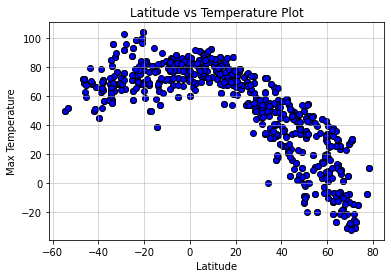

In [19]:
#Create Scatterplot
plt.scatter(weather_info["Latitude"], weather_info ["Max Temperature"], facecolor = "blue", edgecolor = "black")

#Use proper labelling & titles
plt.title("Latitude vs Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel ("Max Temperature")
plt.grid (linewidth =1, alpha = 0.5)


#Save figure as .png
plt.savefig("Latitude vs Temperature Plot.png")


In [ ]:
#The plot above is looking at latitude vs temperature of specific cities. As seen from the graph, as latitude increases, it looks like max temperature decreases.

## Latitude vs. Humidity Plot

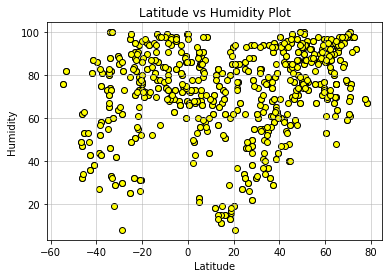

In [20]:
#Create Scatterplot
plt.scatter(weather_info["Latitude"], weather_info ["Humidity"], facecolor = "yellow", edgecolor = "black")

#Use proper labelling & titles
plt.title("Latitude vs Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.grid (linewidth =1, alpha = 0.5)


#Save figure as .png
plt.savefig("Latitude vs Humidity Plot.png")

In [ ]:
#The graph above looks at the relationship between latitude of the location of a city vs the humidity in that city. Given that the data points are all spread out, it is harder to find a correlation between these two variables.

## Latitude vs. Cloudiness Plot

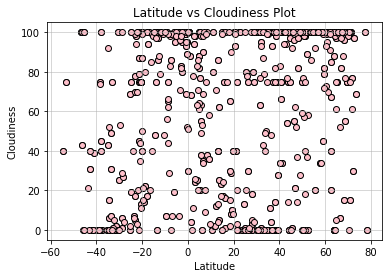

In [21]:
#Create Scatterplot
plt.scatter(weather_info["Latitude"], weather_info ["Cloudiness"], facecolor = "pink", edgecolor = "black")

#Use proper labelling & titles
plt.title("Latitude vs Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.grid (linewidth =1, alpha = 0.5)


#Save figure as .png
plt.savefig("Latitude vs Cloudiness Plot.png")

In [ ]:
#The graph above analyzes the relationship between latitude of a city's location vs cloudiness in that city. The data points are very scattered and so it is difficult to draw a correlation between these two variables.

## Latitude vs. Wind Speed Plot

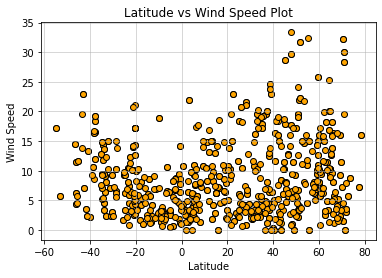

In [22]:
#Create Scatterplot
plt.scatter(weather_info["Latitude"], weather_info ["Wind Speed"], facecolor = "orange", edgecolor = "black")

#Use proper labelling & titles
plt.title("Latitude vs Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.grid (linewidth =1, alpha = 0.5)


#Save figure as .png
plt.savefig("Latitude vs Wind Speed Plot.png")

In [ ]:
#The graph above shows the relationship between a city's latitude vs the wind speed in that city. Again, the data points are spread out throughout the graph and so it is difficult to draw a correlation between the two variables.

## Linear Regression

In [7]:
#Split up Northern and Souther Hemispheres
north_hem = weather_info.loc[weather_info["Latitude"] >=0]
south_hem = weather_info.loc[weather_info["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

(-0.8704235729114513, 6.240211229615442e-120)


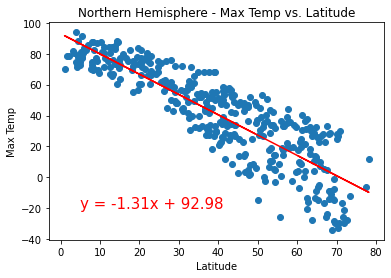

In [8]:
x= north_hem ['Latitude']
y = north_hem ['Max Temperature']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (5,-20), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.show()

In [ ]:
#For the Northern Hemisphere, when graphing latitude vs max temperature, it seems like there is a negative correlation. That means that whenever Max temp increases, latitude decreases and vice versa.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(0.3822957266334287, 1.0917252037537935e-07)


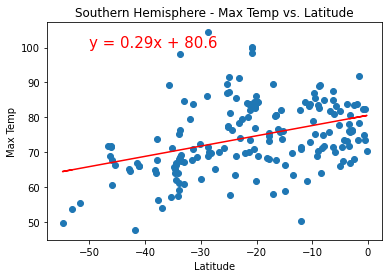

In [13]:
x= south_hem ['Latitude']
y = south_hem ['Max Temperature']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (-50,100), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.show()

In [ ]:
#When looking at the Southern Hemisphere, the correlation is different. It seems like more of a positive correlation - as Latitude increases, so does Max Temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(0.38784861371954416, 2.865628469502326e-15)


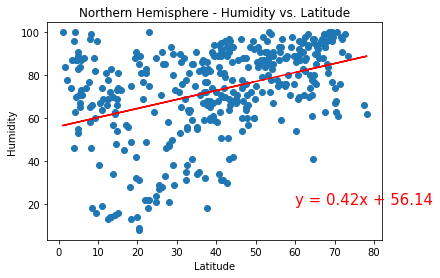

In [15]:
x= north_hem ['Latitude']
y = north_hem ['Humidity']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (60,20), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.show()

In [ ]:
#When looking at Northern Hemisphere data comparing the relationship between Latitude and Humidity, although the correlation does not seem strong, it seems like a positive correlation. When Latitude increases, so does humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(0.37299207089118114, 2.326318145038824e-07)


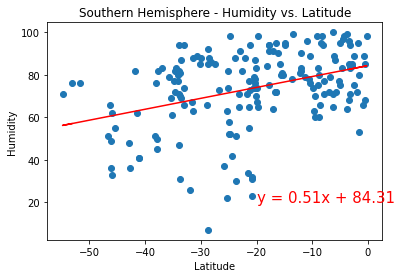

In [17]:
x= south_hem ['Latitude']
y = south_hem ['Humidity']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (-20,20), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.show()

In [ ]:
#When looking at Southern Hemisphere data comparing the relationship between Latitude and Humidity, although the correlation does not seem strong, it seems like a positive correlation as well. When Latitude increases, so does humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(0.29452856318982734, 3.827897544948125e-09)


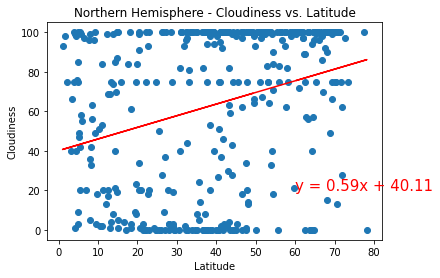

In [18]:
x= north_hem ['Latitude']
y = north_hem ['Cloudiness']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (60,20), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.show()

In [ ]:
#When looking at the relationship between cloudiness and latitude in the northern hemisphere, although the data is very spread out, there seems to be a positive correlation. In other words, when the latitude increases, so does cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(0.4103202176707729, 9.654537981312385e-09)


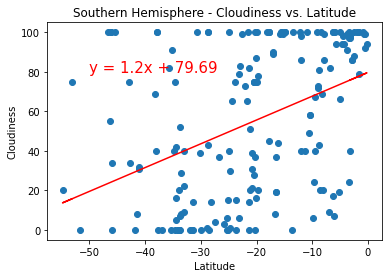

In [20]:
x= south_hem ['Latitude']
y = south_hem ['Cloudiness']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (-50,80), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.show()

In [ ]:
#Data for the relationship between cloudiness and latitude in the Southern hemisphere mimics that of the northern hemisphere. The relationship also looks like it has a positive correlation - as latitude increases, so does cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(0.06675735067210434, 0.19118789528607055)


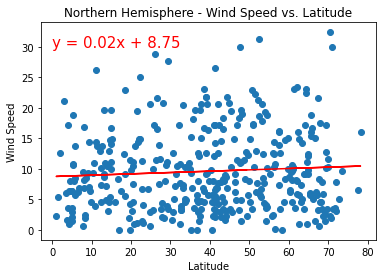

In [22]:
x= north_hem ['Latitude']
y = north_hem ['Wind Speed']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (0,30), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.show()

In [ ]:
#When looking at the northern hemisphere relationship between wind speed and latitude, the correlation is very weak and therefore not much can be concluded.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(-0.35869727743662577, 7.109524947720878e-07)


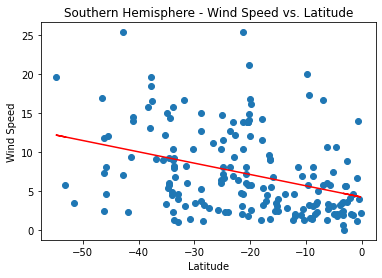

In [23]:
x= south_hem ['Latitude']
y = south_hem ['Wind Speed']
correlation = st.pearsonr(x,y)
print(correlation)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_equation, (60,20), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.show()

In [ ]:
#When looking at the southern hemisphere relationship between wind speed and latitude, the correlation seems to be a negative one. As latitude increases, wind speed decreases.